# Предварительный анализ

In [260]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm 
from statsmodels.formula.api import glm

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from IPython.display import HTML, SVG, display
from graphviz import Source


def print_roc(y_test, predictions):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [261]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [262]:
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,literature_score,rus_score,have_no_problem
0,female,B,bachelor's degree,1,0,4,4,4,1
1,female,C,some college,1,1,4,5,5,1
2,female,B,master's degree,1,0,5,5,5,1
3,male,A,associate's degree,0,0,3,3,3,0
4,male,C,some college,1,0,4,4,4,1
5,female,B,associate's degree,1,0,4,5,4,1
6,female,B,some college,1,1,5,5,5,1
7,male,B,some college,0,0,2,3,2,0
8,male,D,high school,0,1,4,4,4,1
9,female,B,high school,0,0,2,3,3,0


<AxesSubplot:xlabel='test_preparation_course', ylabel='count'>

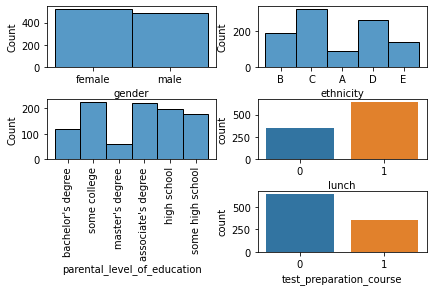

In [263]:
# Отрисовка гистограмм столбцов исходных данных
fig, ax = plt.subplots(3, 2)
fig.tight_layout()
ax[2, 0].axis('off')

sns.histplot(data=df, x='gender', ax=ax[0, 0])
sns.histplot(data=df, x='ethnicity', ax=ax[0, 1])
sns.histplot(data=df, x='parental_level_of_education', ax=ax[1, 0])

ax[1, 0].xaxis.set_visible(True)
for tick in ax[1, 0].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(data=df, x='lunch', ax=ax[1, 1])
sns.countplot(data=df, x='test_preparation_course', ax=ax[2, 1])

In [264]:
# Построение точечного 3D графика для учебных предметов
fig = px.scatter_3d(df, x='math_score', y='rus_score', z='literature_score',
              color='have_no_problem', height=600)
fig

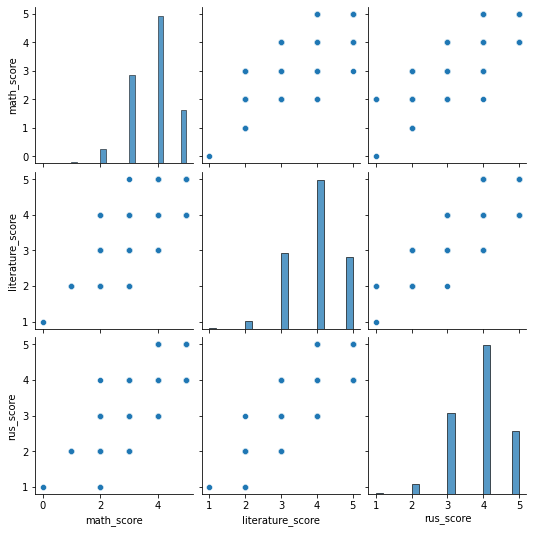

In [265]:
# Построение попарных точечных графиков и гистограмм для отдельных учебных предметов
ax = sns.pairplot(df[['math_score', 'literature_score', 'rus_score']])
ax

# Создание и использование моделей

In [266]:
features = np.array(['gender', 'ethnicity', 'lunch', 'test_preparation_course', 'parental_level_of_education'])

In [267]:
X = df[features]
y = df['have_no_problem']

In [268]:
X.head()

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education
0,female,B,1,0,bachelor's degree
1,female,C,1,1,some college
2,female,B,1,0,master's degree
3,male,A,0,0,associate's degree
4,male,C,1,0,some college


In [269]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: have_no_problem, dtype: int64

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

# Логистическая регрессия

In [271]:
log_reg = glm(
    f'have_no_problem ~ {" + ".join(features) if len(features) else "1"}',
    data=pd.concat([X_train, y_train], axis=1),
    family=sm.families.Binomial()).fit()

# Сводная таблица

In [272]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        have_no_problem   No. Observations:                  670
Model:                            GLM   Df Residuals:                      657
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.89
Date:                Thu, 25 Mar 2021   Deviance:                       589.78
Time:                        18:36:20   Pearson chi2:                     610.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.4488      0.420      1.068      0.286      -0.375       1.273
gender[T.male]                                      -0.8481      0.213     -3.974      0.000      -1.266      -0.430
ethnicity[T.B]                                       0.1293      0.383      0.338      0.735      -0.621       0.879
ethnicity[T.C]                                       0.5299      0.371      1.427      0.154      -0.198       1.258
ethnicity[T.D]                                       0.7310      0.382      1.913      0.056      -0.018       1.480
ethnicity[T.E]                                       0.9175      0.454      2.020      0.043       0.027       1.808
parental_level_of_education[T.bachelor's degree]     0.3196      0.423      0.756      0.449      -0.509       1.148
parental_level_of_education[T.high school]          -0.5596      0.308     -1.817      0.069      -1.163       0.044
parental_level_of_education[T.master's degree]       0.9672      0.664      1.457      0.145      -0.334       2.268
parental_level_of_education[T.some college]          0.1299      0.319      0.408      0.683      -0.495       0.754
parental_level_of_education[T.some high school]     -0.6897      0.318     -2.170      0.030      -1.313      -0.067
lunch                                                1.2340      0.211      5.850      0.000       0.821       1.647
test_preparation_course                              1.1118      0.247      4.506      0.000       0.628       1.595
====================================================================================================================
"""

In [273]:
predictions = log_reg.predict(X_test)

# Выявленные студенты в группе риска

In [274]:
X_test

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education
34,male,E,1,0,some college
36,female,D,1,0,associate's degree
480,male,B,1,1,high school
491,female,C,1,0,associate's degree
720,female,C,0,0,some college
...,...,...,...,...,...
894,female,E,1,0,associate's degree
902,female,A,0,1,high school
997,female,C,0,1,high school
875,male,C,0,0,some college


In [275]:
students_with_problems = X_test.copy()
students_with_problems['predictions'] = predictions
students_with_problems[students_with_problems.iloc[:,-1] < .5]

,gender,ethnicity,lunch,test_preparation_course,parental_level_of_education,predictions
395,male,A,0,0,high school,0.277098
218,male,B,0,0,high school,0.303727
62,male,A,0,0,associate's degree,0.401479
512,male,D,0,0,some high school,0.411440
429,male,C,0,0,some high school,0.363743
327,male,A,0,0,some college,0.433063
427,male,C,0,0,some high school,0.363743
368,female,A,0,0,some high school,0.440062
550,male,C,0,0,some high school,0.363743
84,male,D,0,0,high school,0.443271


# Метрики качества модели

In [276]:
print(classification_report(y_test, round(predictions)))

              precision    recall  f1-score   support

           0       0.38      0.12      0.18        68
           1       0.81      0.95      0.87       262

    accuracy                           0.78       330
   macro avg       0.59      0.53      0.53       330
weighted avg       0.72      0.78      0.73       330



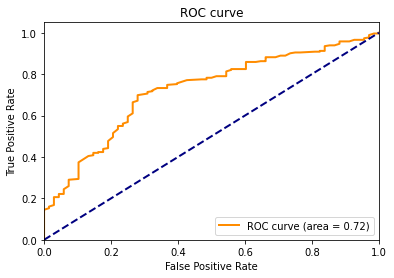

In [277]:
print_roc(y_test, predictions)

# Дерево решений

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.model_selection import GridSearchCV

In [279]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [280]:
#dt = DecisionTreeClassifier()
# parameters = {
#     'criterion': ['entropy', 'gini'],
#     'max_depth': range(1, 10),
#     'min_samples_split': range(2, 50),
#     'min_samples_leaf': range(1, 50),
# }

# search = GridSearchCV(dt, parameters,
#                       cv=5,
#                       n_jobs=-1).fit(X_train, y_train)
# search.best_params_

In [281]:
#best_tree = search.best_estimator_

In [282]:
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2
)

In [283]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

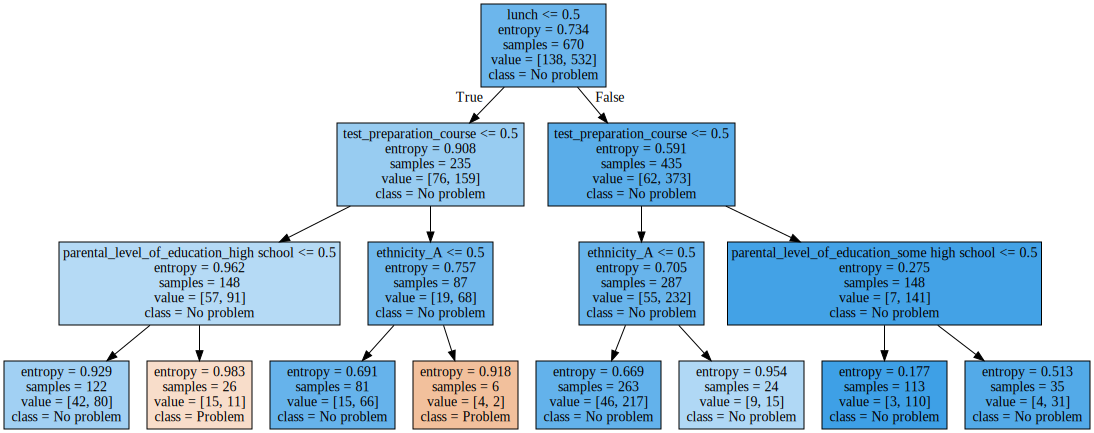

In [284]:
graph = Source(tree.export_graphviz(
    best_tree,
    out_file=None,
    feature_names=list(X),
    class_names=['Problem', 'No problem'],
    filled=True
))

display(SVG(graph.pipe(format='svg')))

In [285]:
feature_importances = best_tree.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature_importances': feature_importances,
    'features': list(X_train)
})
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature_importances,features
0,0.388840,lunch
1,0.352989,test_preparation_course
4,0.144515,ethnicity_A
11,0.063179,parental_level_of_education_high school
14,0.050477,parental_level_of_education_some high school
2,0.000000,gender_female
3,0.000000,gender_male
5,0.000000,ethnicity_B
6,0.000000,ethnicity_C
7,0.000000,ethnicity_D


In [286]:
predictions = best_tree.predict_proba(X_test)[:, 1]

In [305]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.79      1.00      0.88       260

    accuracy                           0.79       330
   macro avg       0.90      0.51      0.46       330
weighted avg       0.83      0.79      0.70       330



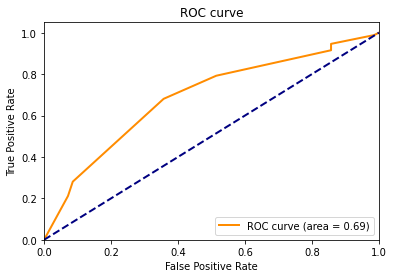

In [288]:
print_roc(y_test, predictions)

# Случайный лес

In [289]:
# rf = RandomForestClassifier()
# parameters = {
#     'max_depth': range(1, 5),
#     'min_samples_split': range(2, 40, 10),
#     'min_samples_leaf': range(2, 40, 10),
#     'n_estimators': range(30, 40, 2),
# }

# search = GridSearchCV(rf, parameters,
#                       cv=5,
#                       n_jobs=-1).fit(X_train, y_train)
# search.best_params_

In [290]:
# best_forest = search.best_estimator_

In [291]:
best_forest = RandomForestClassifier(
    max_depth=4,
    min_samples_leaf=2, 
    min_samples_split=22,
    n_estimators=36
)

In [292]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=22,
                       n_estimators=36)

In [293]:
feature_importances = best_forest.feature_importances_
feature_importances_df = pd.DataFrame({
    'feature_importances': feature_importances,
    'features': list(X_train)
})
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature_importances,features
0,0.259549,lunch
1,0.186798,test_preparation_course
4,0.118574,ethnicity_A
11,0.078272,parental_level_of_education_high school
2,0.076120,gender_female
14,0.057320,parental_level_of_education_some high school
13,0.034273,parental_level_of_education_some college
3,0.033654,gender_male
8,0.030535,ethnicity_E
10,0.028587,parental_level_of_education_bachelor's degree


In [300]:
predictions = best_forest.predict_proba(X_test)[:, 1]

In [303]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.79      1.00      0.88       260

    accuracy                           0.79       330
   macro avg       0.90      0.51      0.46       330
weighted avg       0.83      0.79      0.70       330



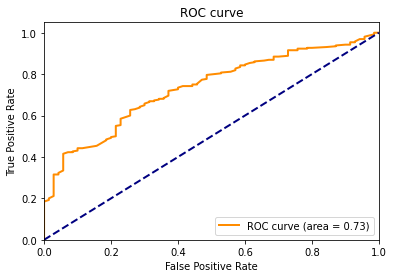

In [304]:
print_roc(y_test, predictions)